## Carga de módulos

In [1]:
import warnings
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from utilities.utils import normal_test, calculate_vif

warnings.filterwarnings(action="ignore")
pd.set_option("float_format", '{:.2f}'.format)

In [2]:
housing = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/DS-ONLINE-76/master/data/housing.csv")
print(f"El set de datos tiene {housing.shape[0]} observaciones, y {housing.shape[1]} columnas.")
housing.head()

El set de datos tiene 20640 observaciones, y 10 columnas.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Estadísticas descriptivas

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


* Parece que **housing_median_age**, **median_income**, y tal vez **household** son normales.
* Las demás variables deben tener un sesgo positivo o negativo.

In [5]:
housing.describe(exclude="number")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


### Datos missing

<AxesSubplot:>

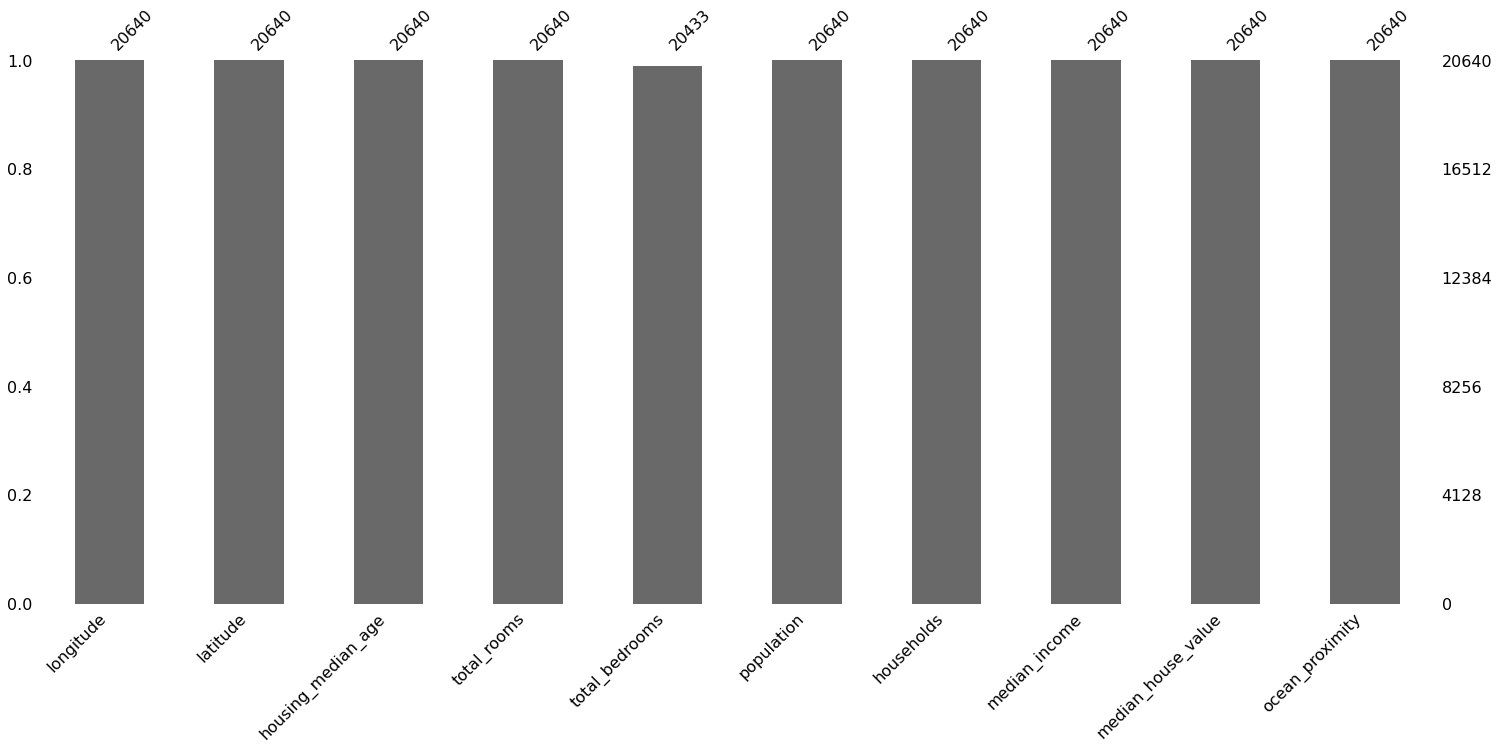

In [6]:
msno.bar(df=housing)

<AxesSubplot:>

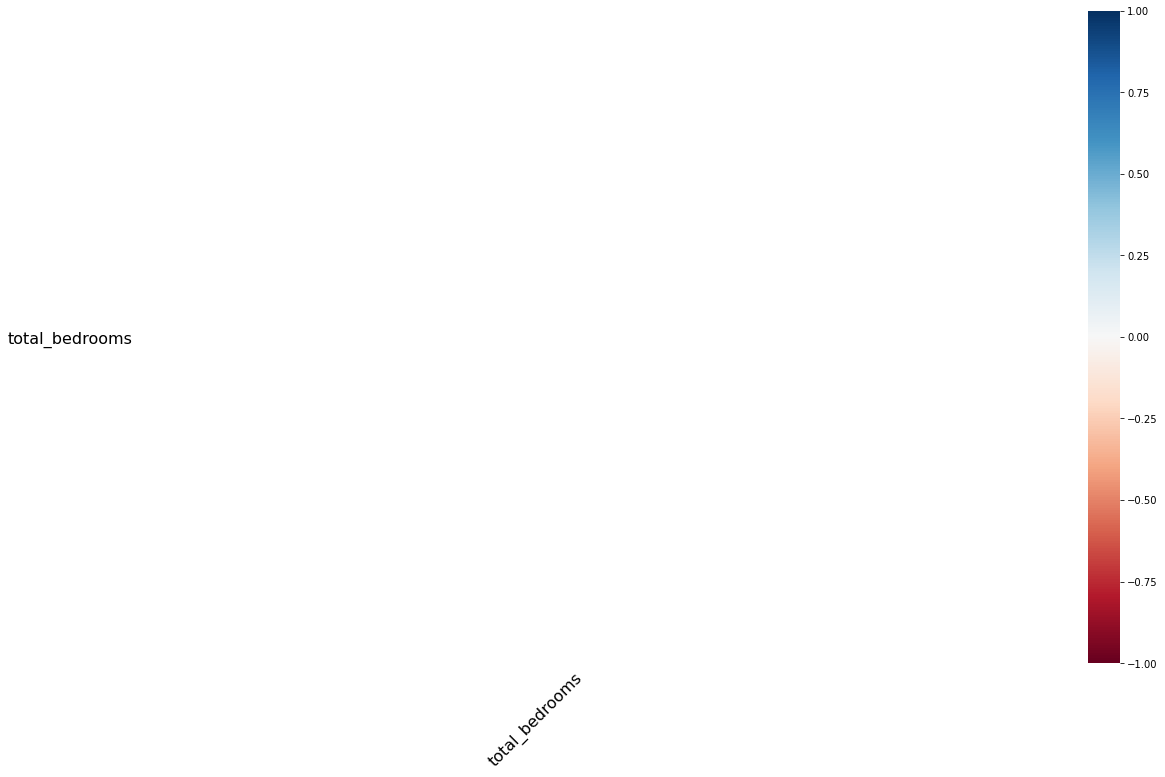

In [7]:
msno.heatmap(df=housing)

## Análisis exploratorio de datos

### Análisis univariado

* Numéricas (histograma, boxplot, ecdf, etc).
* Categóricas (Gráficos de barras)

### Análisis bivariado

Quiero encontrar si existe relación o asociación entre un par de variables.

* Continuas vs continuas (Scatterplot)
* Continuas vs categóricas (Boxplot, Pointplot, Coordenadas paralelas)
* Categóricas vs categóricas (Tablas de contingencia, la matriz de calor de la tabla de contingencia)

### Análisis multivariado

Quiero ver como se relacionan todas las variables.

* Clustering
* Técnicas de reducción de la dimensionalidad.

## Análisis Univariado

In [8]:
cols_to_drop = ["longitude", "latitude"]

housing.drop(labels=cols_to_drop, axis="columns", inplace=True)

In [9]:
numerical_features = housing.select_dtypes(include="number").columns.tolist()
categorical_features = [col for col in housing.columns if col not in numerical_features]

In [10]:
import seaborn as sns

La variable housing_median_age: 



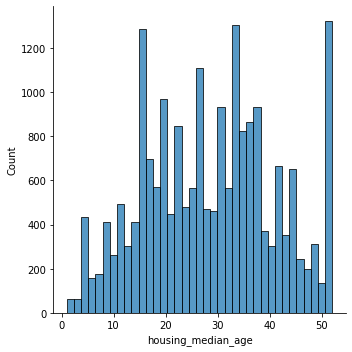

-----------------------------------------------------------------------------------------------------------
La variable total_rooms: 



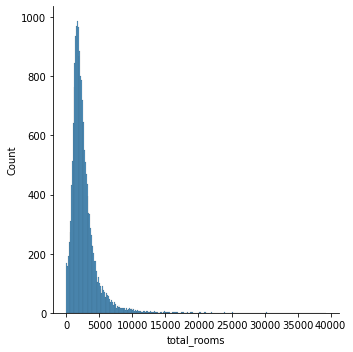

-----------------------------------------------------------------------------------------------------------
La variable total_bedrooms: 



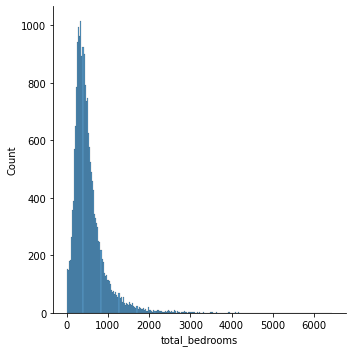

-----------------------------------------------------------------------------------------------------------
La variable population: 



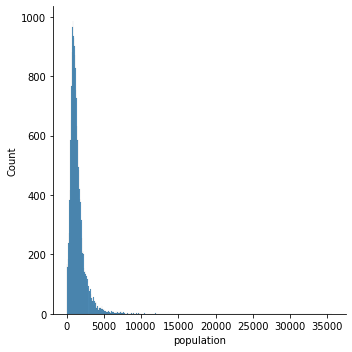

-----------------------------------------------------------------------------------------------------------
La variable households: 



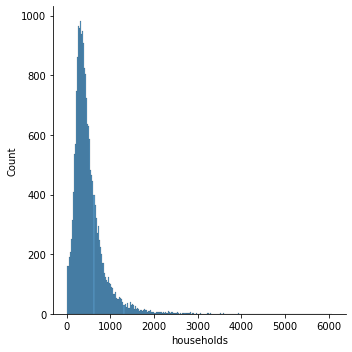

-----------------------------------------------------------------------------------------------------------
La variable median_income: 



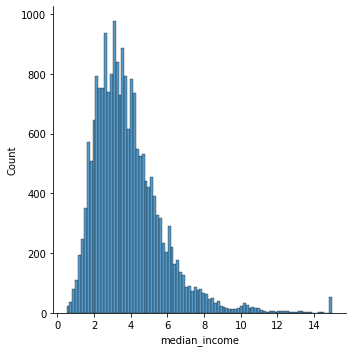

-----------------------------------------------------------------------------------------------------------
La variable median_house_value: 



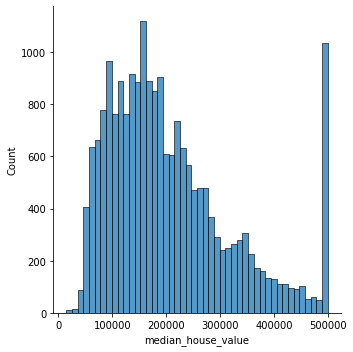

-----------------------------------------------------------------------------------------------------------


In [11]:
for col in numerical_features:
    print(f"La variable {col}: \n")
    sns.displot(data=housing, x=col)
    plt.show()
    print("-----------------------------------------------------------------------------------------------------------")

In [12]:
for col in numerical_features:
    print(f"Para la variable {col}")
    normal_test(data=housing.dropna(), column=col, method="anderson")
    print("----------------------------------------------------------------------------------------------------------- \n")

Para la variable housing_median_age
Para housing_median_age con la prueba de Anderson-Darling: 

Estadistico: 87
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la variable total_rooms
Para total_rooms con la prueba de Anderson-Darling: 

Estadistico: 1243
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la variable total_bedrooms
Para total_bedrooms con la prueba de Anderson-Darling: 

Estadistico: 1113
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la

## Bivariado

### Continuas vs Continuas

Vamos a verificar si existe una relación o asociación entre las variables numéricas y nuestra variable objetivo

La relación entre housing_median_age y median house value: 



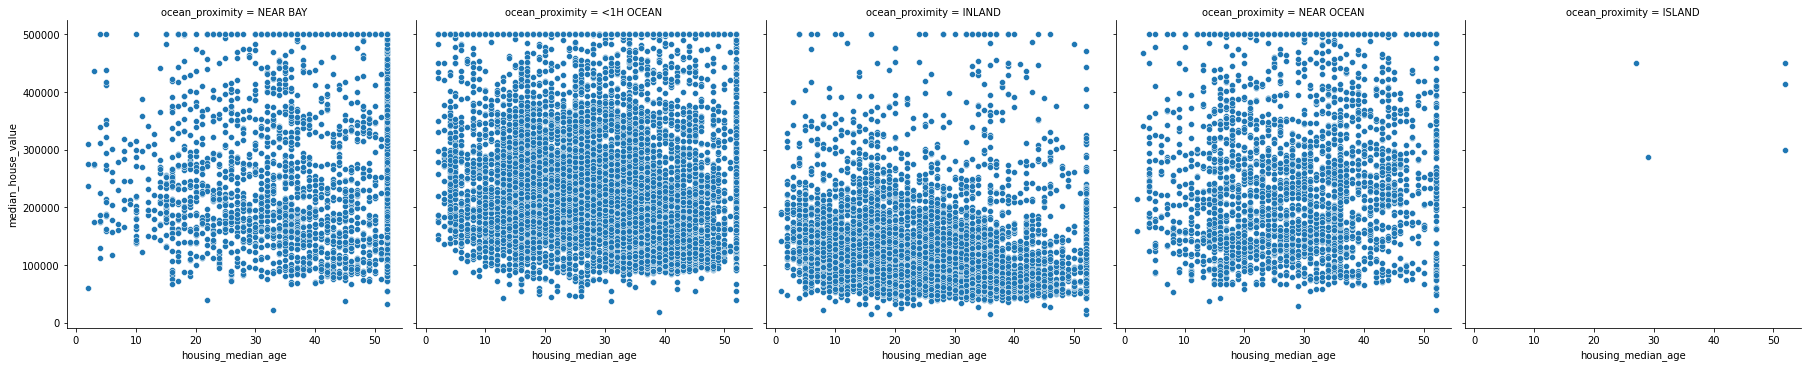

La relación entre total_rooms y median house value: 



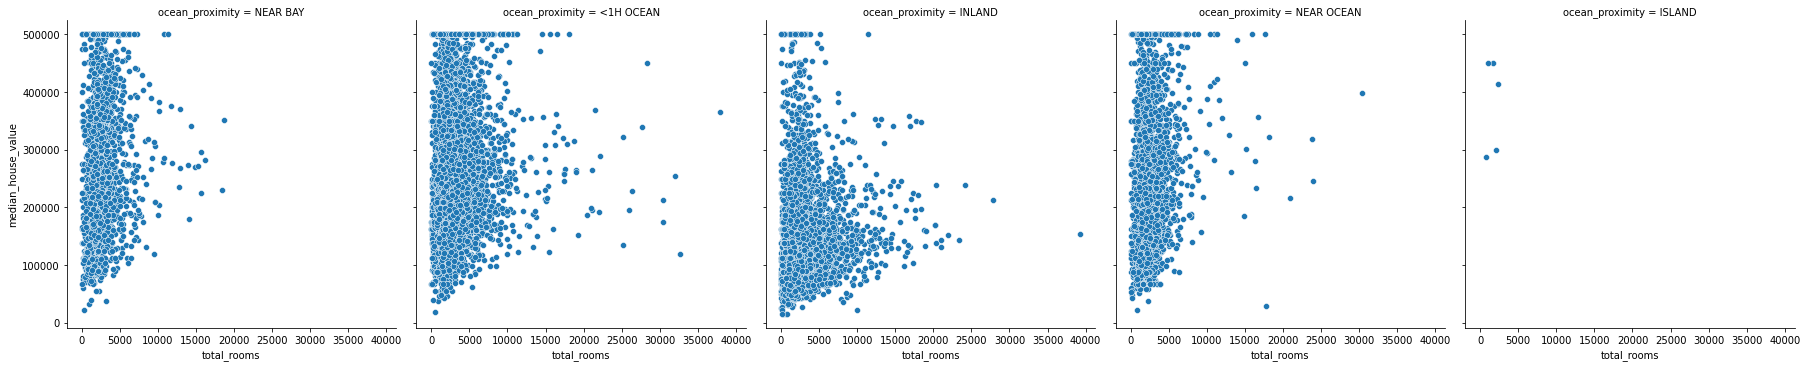

La relación entre total_bedrooms y median house value: 



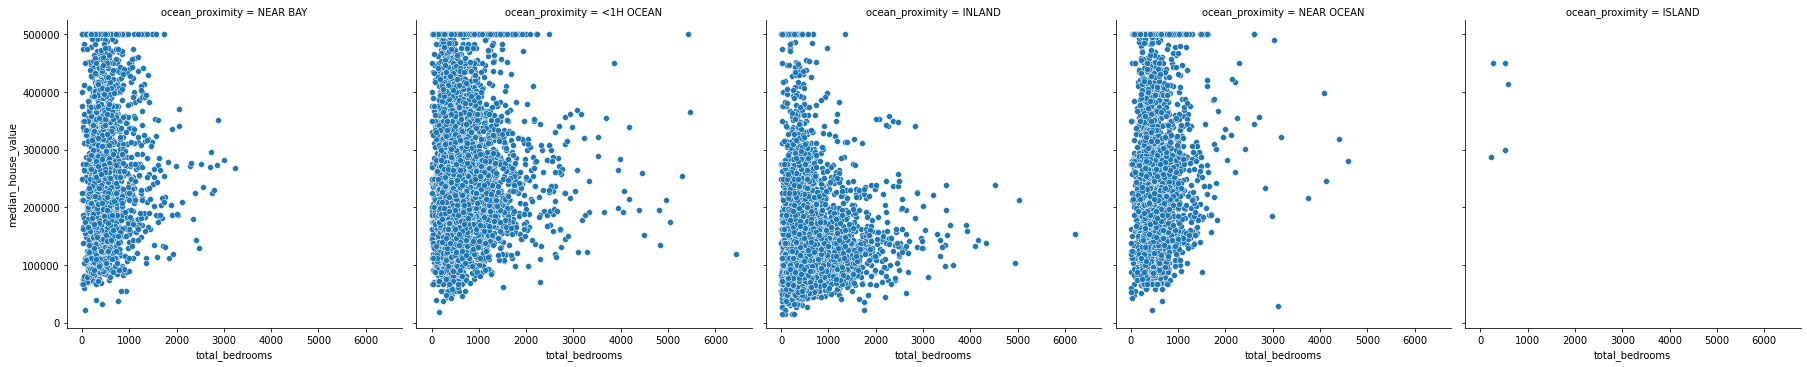

La relación entre population y median house value: 



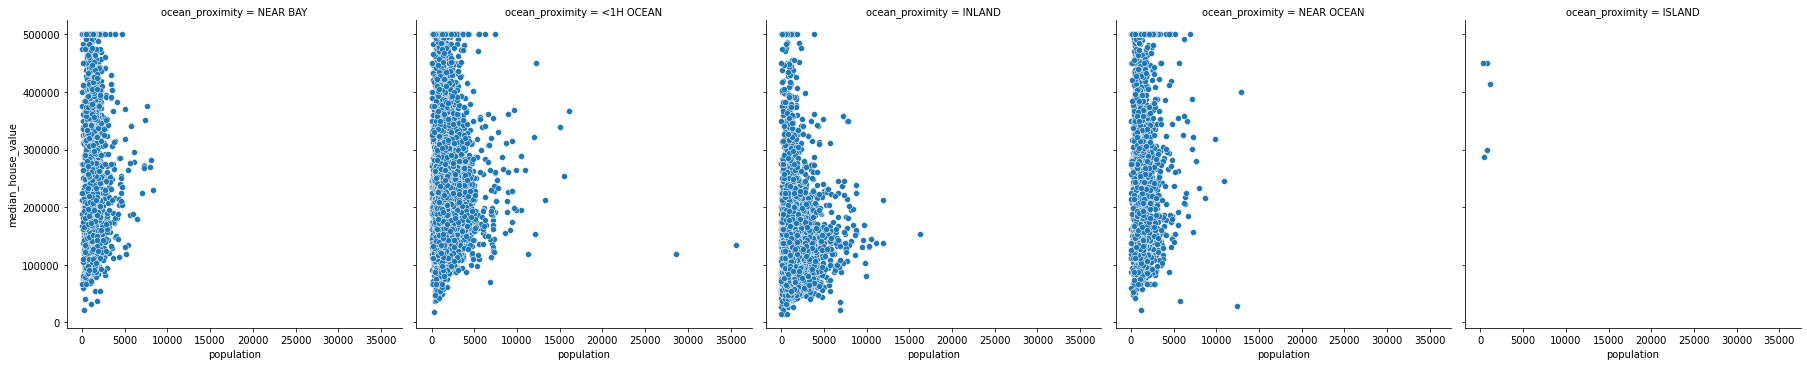

La relación entre households y median house value: 



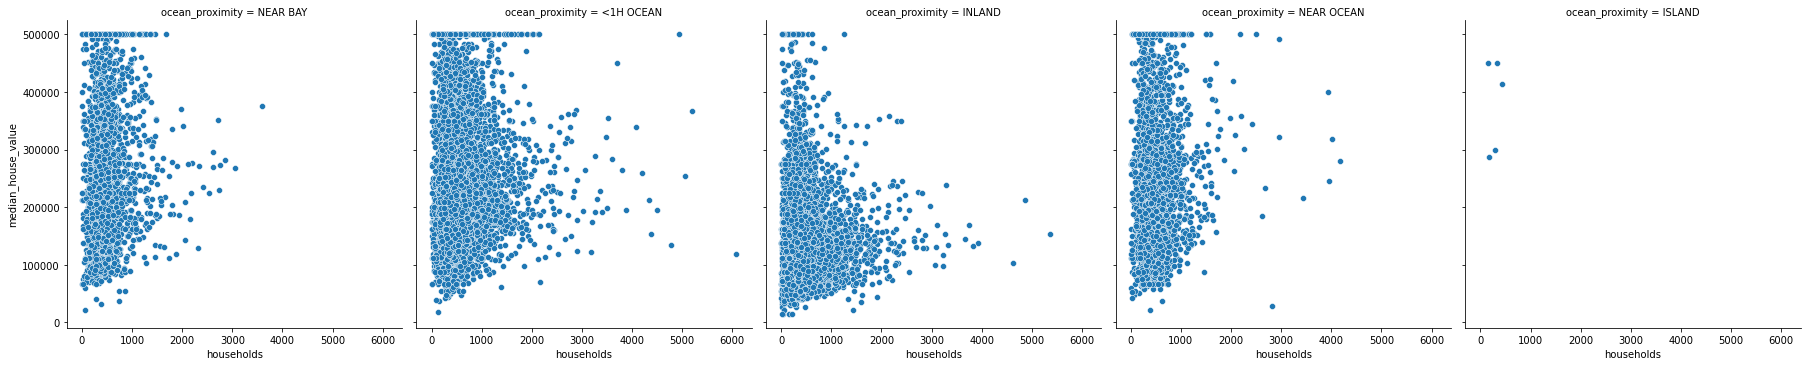

La relación entre median_income y median house value: 



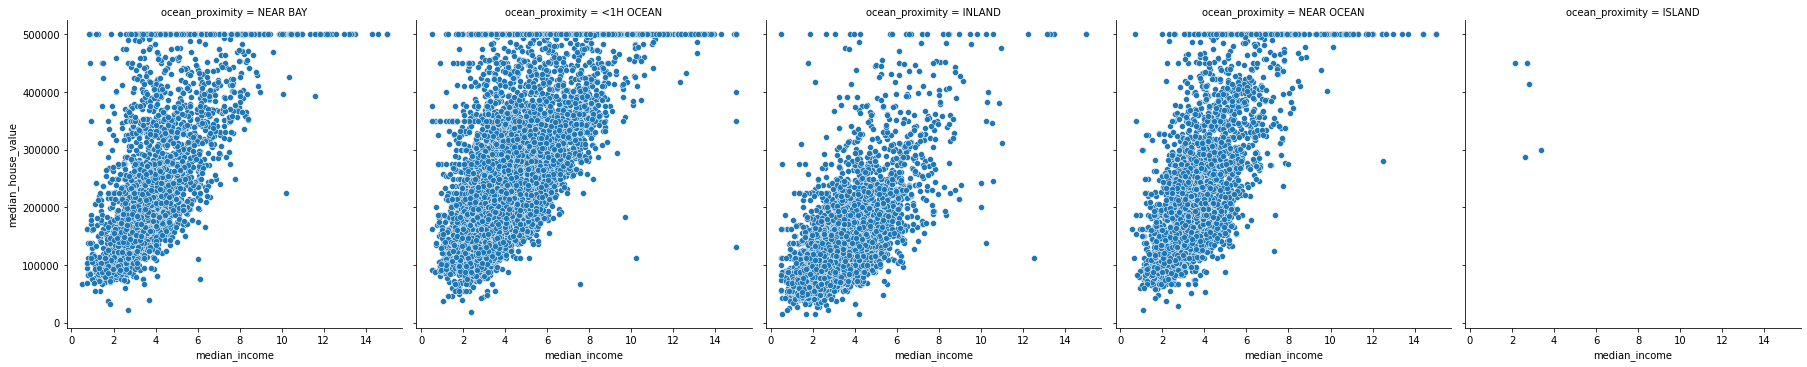

In [13]:
for col in numerical_features:
    if col != "median_house_value":
        print(f"La relación entre {col} y median house value: \n")
        sns.relplot(data=housing, x=col, y="median_house_value",
                    kind="scatter", col="ocean_proximity")
        plt.show()

* Según lo anterior vemos que parece haber una relación o asociación lineal no muy fuerte entre **median_income** discriminada por **ocean_proximity** con respecto a nuestra variable objetivo **median_house_value**.
* No parece haber una relación lineal entre las demás variables numéricas con respecto a nuestra variable objetivo.

### Categórica vs Continua

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

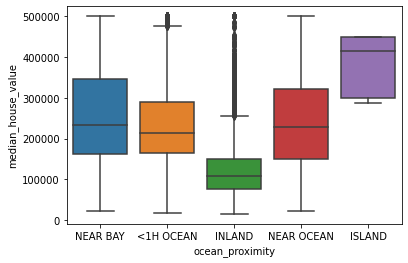

In [14]:
sns.boxplot(data=housing, x="ocean_proximity", y="median_house_value")

### Correlación entre variables

<AxesSubplot:>

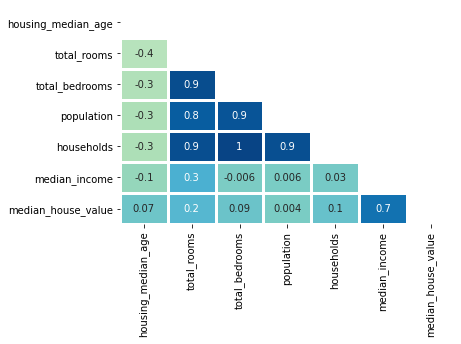

In [15]:
correlacion = housing.corr(method="spearman")

mask = np.triu(correlacion)

sns.heatmap(correlacion, annot=True, fmt=".1g", cbar=False,
            vmin=-1, vmax=1, linecolor="w", linewidths=3, mask=mask, cmap="GnBu")

In [16]:
# !pip install statsmodels

In [17]:
data = pd.get_dummies(data=housing.drop("median_house_value", axis=1),
                      columns=categorical_features, drop_first=True)

vif = calculate_vif(data=data.dropna())
vif

,feature,VIF
0,housing_median_age,4.18
1,total_rooms,27.78
2,total_bedrooms,87.83
3,population,15.93
4,households,92.73
5,median_income,4.85
6,ocean_proximity_INLAND,1.51
7,ocean_proximity_ISLAND,1.00
8,ocean_proximity_NEAR BAY,1.34
9,ocean_proximity_NEAR OCEAN,1.26


* **total_rooms**, **total_bedrooms**, **population** y **households** son variables que hacen que tengamos un problema de multicolinealidad.

##### ¿Cómo corregir multicolinealidad?

Para corregir multicolinealidad si mi tarea es un ejercicio de inferencia (es decir, me interesa saber como afectan mis variables independientes a mi variable objetivo) eliminamos algunas de las variables.

Podemos eliminar utilizando técnicas de selección de características:

* De lo general a lo particular (Solo usar cuando mi enfoque es inferencia)
* De lo particular a lo general (Solo usar cuando mi enfoque es inferencia)
* **Regularización** (Ridge, Lasso) (Enfoque sea predicción)

## Análisis multivariado

* Clustering
* Reducción de la dimensionalidad

### Clustering

Vamos a aplicar clustering sobre todas las variables.

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [19]:
imputer = KNNImputer()
scaler = RobustScaler()

X = imputer.fit_transform(housing[numerical_features])
X = pd.DataFrame(scaler.fit_transform(X), columns=numerical_features)
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.63,-0.73,-0.87,-0.90,-0.87,2.20,1.88
1,-0.42,2.92,1.91,1.32,2.24,2.19,1.23
2,1.21,-0.39,-0.70,-0.71,-0.71,1.71,1.19
3,1.21,-0.50,-0.57,-0.65,-0.58,0.97,1.11
4,1.21,-0.29,-0.44,-0.64,-0.46,0.14,1.12


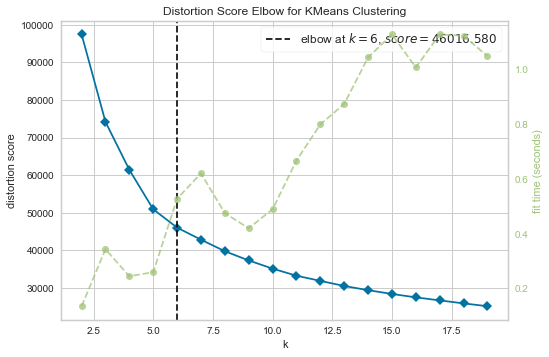

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
kmeans = KMeans(random_state=42)

visualizer = KElbowVisualizer(estimator=kmeans, k=(2, 20)).fit(X)
visualizer.show()

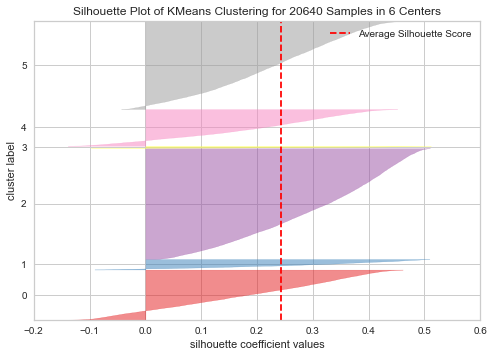

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
kmeans = KMeans(n_clusters=6, random_state=42)

silhouette = SilhouetteVisualizer(estimator=kmeans).fit(X)
silhouette.show()

In [22]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

pca_output = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
pca_output["cluster"] = pd.Series(kmeans.predict(X)).apply(lambda x: f"cluster_{int(x + 1)}")
pca_output.head()

,PC1,PC2,cluster
0,-2.21,2.72,cluster_1
1,3.76,2.23,cluster_5
2,-1.86,1.92,cluster_1
3,-1.79,1.28,cluster_1
4,-1.58,0.69,cluster_3


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

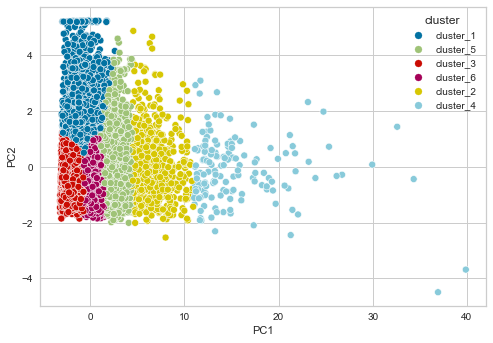

In [24]:
sns.scatterplot(data=pca_output, x="PC1", y="PC2", hue="cluster")

In [25]:
X.loc[:, numerical_features] = scaler.inverse_transform(X)
X["cluster"] = pca_output["cluster"]
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,cluster_1
1,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,cluster_5
2,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,cluster_1
3,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,cluster_1
4,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,cluster_3


In [27]:
table = np.round(X.groupby(by="cluster").mean(), 2).reset_index()
table

,cluster,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,cluster_1,31.03,2285.99,376.64,957.47,360.75,6.50,378666.93
1,cluster_2,16.33,8301.36,1677.48,4222.14,1531.06,4.24,219976.81
2,cluster_3,32.80,1288.27,277.34,774.85,258.39,3.06,151834.73
3,cluster_4,10.40,17221.49,3177.15,8356.96,2908.71,4.73,226720.70
4,cluster_5,21.09,4688.04,973.29,2489.01,898.59,4.04,226949.86
5,cluster_6,27.09,2644.32,574.91,1565.05,534.06,3.26,167896.82


In [29]:
X.head(2)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,cluster_1
1,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,cluster_5


In [31]:
from utilities.plotting import radar_chart
from sklearn.preprocessing import MinMaxScaler

In [32]:
minmax = MinMaxScaler()

X.loc[:, numerical_features] = minmax.fit_transform(X[numerical_features])
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,0.78,0.02,0.02,0.01,0.02,0.54,0.90,cluster_1
1,0.39,0.18,0.17,0.07,0.19,0.54,0.71,cluster_5
2,1.00,0.04,0.03,0.01,0.03,0.47,0.70,cluster_1
3,1.00,0.03,0.04,0.02,0.04,0.35,0.67,cluster_1
4,1.00,0.04,0.04,0.02,0.04,0.23,0.67,cluster_3


In [33]:
radar_chart(df=X, columns=numerical_features, label="cluster", title="Comportamiento de los clusters")

### PCA + Clustering

In [28]:
imputer = KNNImputer()
scaler = RobustScaler()

X1 = imputer.fit_transform(housing[numerical_features])
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=numerical_features)

In [29]:
pca = PCA().fit(X1)

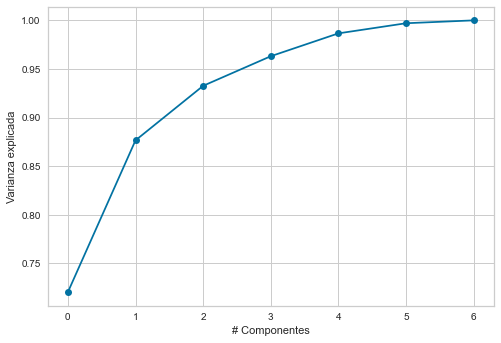

In [30]:
variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(0, len(variance)), variance, marker='o')
plt.xlabel("# Componentes")
plt.ylabel('Varianza explicada')
plt.show()

In [31]:
pca = PCA(n_components=3, random_state=42).fit(X1)

In [32]:
X1 = pd.DataFrame(pca.transform(X1), columns=["PC1", "PC2", "PC3"])

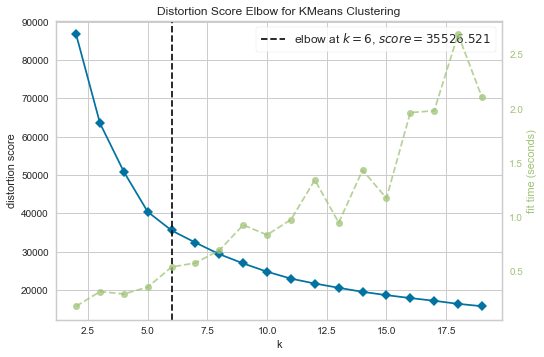

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
kmeans = KMeans(random_state=42)

visualizer = KElbowVisualizer(estimator=kmeans, k=(2, 20)).fit(X1)
visualizer.show()

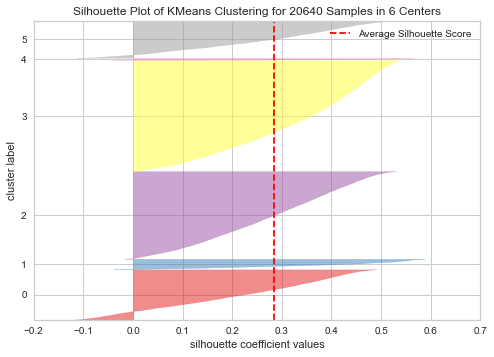

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 20640 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
kmeans = KMeans(n_clusters=6, random_state=42)

silhouette = SilhouetteVisualizer(estimator=kmeans).fit(X1)
silhouette.show()

In [36]:
X1["cluster"] = pd.Series(kmeans.predict(X1)).apply(lambda x: f"cluster_{int(x + 1)}")

In [41]:
colors = {key: value for key, value in zip(sorted(X1["cluster"].unique()), ["r", "g", "b", "y", "k", "c"])}

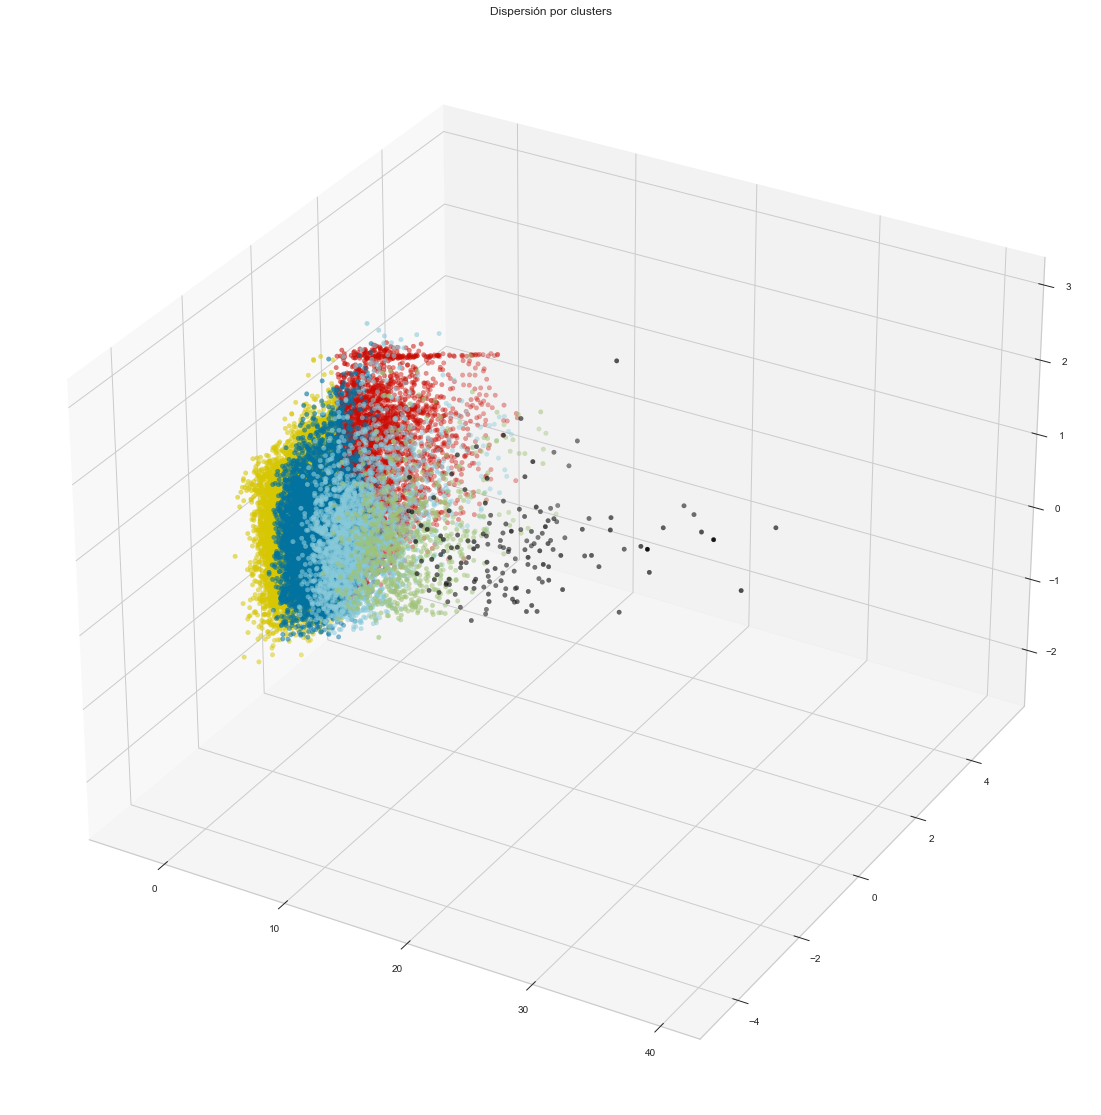

In [43]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")

ax.scatter3D(X1["PC1"], X1["PC2"], X1["PC3"], color=X1["cluster"].map(colors))
plt.title("Dispersión por clusters")
plt.show()